In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import sympy as sy

In [18]:
skew = lambda x: np.array([[0, -x[2], x[1]],
                    [x[2], 0, -x[0]],
                    [-x[1], x[0], 0]])

In [109]:
g = 9.81
x, y = sy.symbols('x y') 
M = 0*x**2
Mlam = sy.lambdify((x,y), M)
Mx = sy.lambdify((x,y), sy.diff(M, x))
My = sy.lambdify((x,y), sy.diff(M, y))

# make_q = lambda nhat, n:

AttributeError: 'int' object has no attribute 'ndim'

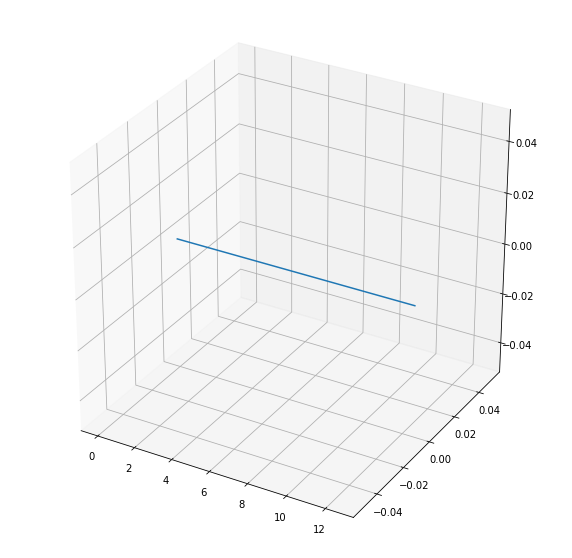

In [110]:
def system(y, t):
    i = 0
    p = y[0:3]
    v = y[3:6]
    R = y[6:].reshape((3,3))
    
    #calculate normal vector
    px = np.array([1,0,Mx(p[0], p[1])])
    py = np.array([0,1,My(p[0], p[1])])
    n = np.cross(px, py)
    nhat = n / np.linalg.norm(n)
    
    #make q
    ndot = np.zeros(3)
    if nhat[2] == 1:
        q = 0
    else:
        q = -ndot[0] / np.sin( np.arccos(nhat[2]) )
    
    #make R dot
    wb = np.array([0, q, theta[i]])
    Rdot = R@skew(wb)
    #make p dot
    pdot = v
    #make v dot
    vdot = np.array([0,0,-g]) + g*nhat*np.cos(q) + R@np.array([u[i],0,0])

    return tuple(pdot) + tuple(vdot) + tuple(Rdot.flatten())

N = 1000
theta = np.zeros(N)
u = np.ones(N)
t_array = np.linspace(0, 5, N)

p0 = np.zeros(3)
v0 = np.zeros(3)
R0 = np.eye(3)
y0 = np.concatenate((p0, v0, R0.flatten()))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

sol = odeint(system, y0, t_array)
ax.plot(sol[:,0], sol[:,1], sol[:,2])

x = np.linspace(-3,3)
y = np.linspace(-3,3)
X,Y = np.meshgrid(x,y)
ax.plot_surface(X,Y,Mlam(X,Y))
# # ax.set_title("Problem 2")
# # ax.set_xlabel(r"$I_1 \omega_1$")
# # ax.set_ylabel(r"$I_2 \omega_2$")
# # ax.set_zlabel(r"$I_3 \omega_3$")

# # plt.savefig('HW3_2.png')
plt.show()

In [111]:
Mlam(X,Y)

0